<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_ML1/blob/main/5%EC%A3%BC%EC%B0%A8_KNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# 라이브러리 불러오기
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
# 분류 데이터 생성
np.random.seed(42)

n_samples = 100
X = np.random.uniform(low=0, high=10, size=(n_samples, 2))
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)
y_train = np.random.choice([0, 1], size=X_train.shape[0])

In [50]:
print(X_train)

[[3.04613769 0.97672114]
 [3.8867729  2.71349032]
 [6.09564334 5.02679023]
 [1.40924225 8.02196981]
 [3.41066351 1.13473521]
 [6.01115012 7.08072578]
 [1.44894872 4.8945276 ]
 [9.85650454 2.42055272]
 [4.56069984 7.85175961]
 [8.28737509 3.56753327]
 [2.89751453 1.61221287]
 [6.90937738 3.86735346]
 [9.39498942 8.9482735 ]
 [3.10982322 3.25183322]
 [3.63629602 9.71782083]
 [6.07544852 1.70524124]
 [8.63103426 6.23298127]
 [9.00418057 6.33101457]
 [4.31945019 2.9122914 ]
 [2.84840494 0.36886947]
 [2.92144649 3.66361843]
 [7.7096718  4.93795596]
 [6.77564362 0.16587829]
 [0.88492502 1.95982862]
 [8.172222   5.55200812]
 [0.20584494 9.69909852]
 [1.19865367 3.37615171]
 [4.17411003 2.2210781 ]
 [7.72244769 1.98715682]
 [0.65051593 9.48885537]
 [0.25419127 1.07891427]
 [0.74550644 9.86886937]
 [1.81824967 1.8340451 ]
 [0.93102768 8.97215758]
 [5.97899979 9.21874235]
 [6.84233027 4.40152494]
 [6.33529711 5.35774684]
 [9.69584628 7.75132823]
 [2.27935163 4.27107789]
 [1.99673782 5.14234438]


In [51]:
print(y_train)

[1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0]


In [52]:
print(X_test)

[[3.20780065 1.8651851 ]
 [4.10382923 7.55551139]
 [9.62447295 2.51782296]
 [1.19594246 7.13244787]
 [8.87212743 4.72214925]
 [3.58465729 1.1586906 ]
 [2.58779982 6.62522284]
 [3.67783133 6.32305831]
 [6.11852895 1.39493861]
 [3.74540119 9.50714306]]


In [53]:
## 분류 KNN
# 맨해튼 거리
def manhattan_distance(x1, x2):
    return np.abs(x1 - x2).sum()

# 유클리디안 거리
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn_classifier(X_train, y_train, X_test, distance, k):
    y_pred = []
    for x_test in X_test:
        distances = [distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])

        # 시각화
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', marker='o', label='Training Dataset')
        plt.scatter(x_test[0], x_test[1], s=150, label='Test Data', marker='*')

        # 거리 방식에 따라 시각화 변경
        if distance.__name__ == 'manhattan_distance':
            for idx in k_indices:
                x1, y1 = X_train[idx]
                x2, y2 = x_test
                plt.plot([x1, x1], [y1, y2], 'k--', alpha=0.5)  # 세로 이동
                plt.plot([x1, x2], [y2, y2], 'k--', alpha=0.5)  # 가로 이동
        elif distance.__name__ == 'euclidean_distance':
            for idx in k_indices:
                x1, y1 = X_train[idx]
                x2, y2 = x_test
                plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.5)  # 직선 연결

        plt.title(f"KNN Classifier (k={k}) - Predicted Label: {most_common[0][0]}")
        plt.legend()
        plt.show()

    return np.array(y_pred)

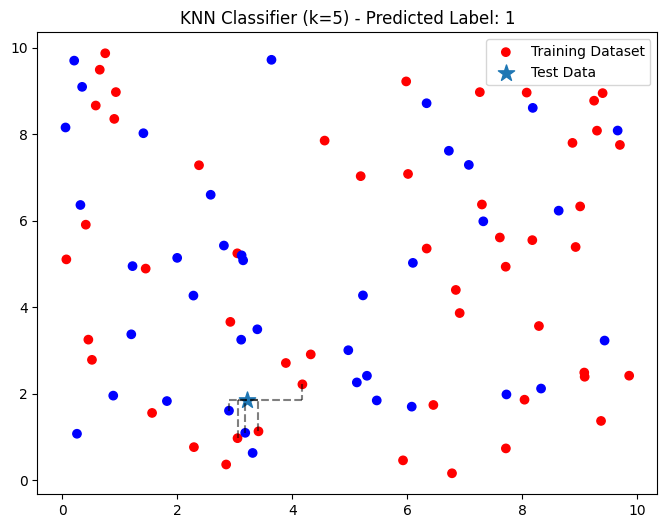

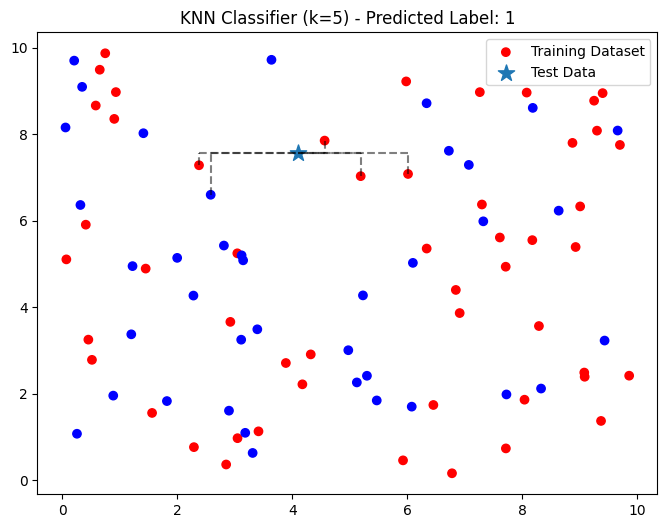

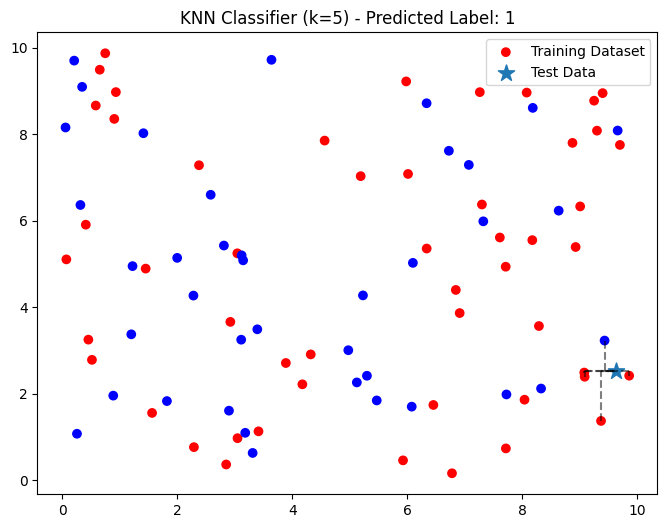

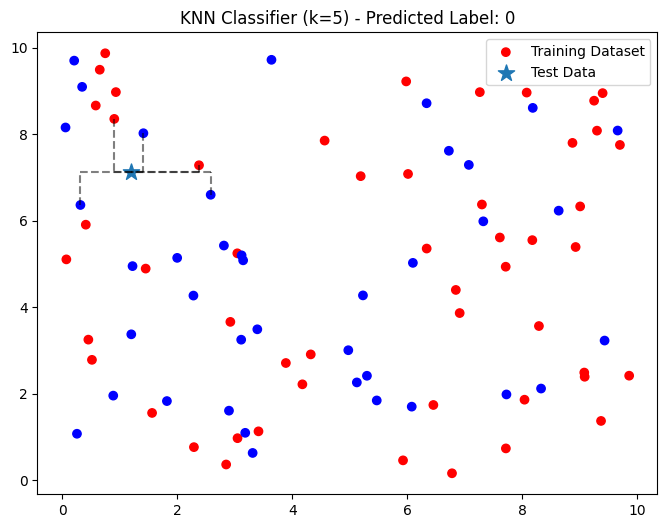

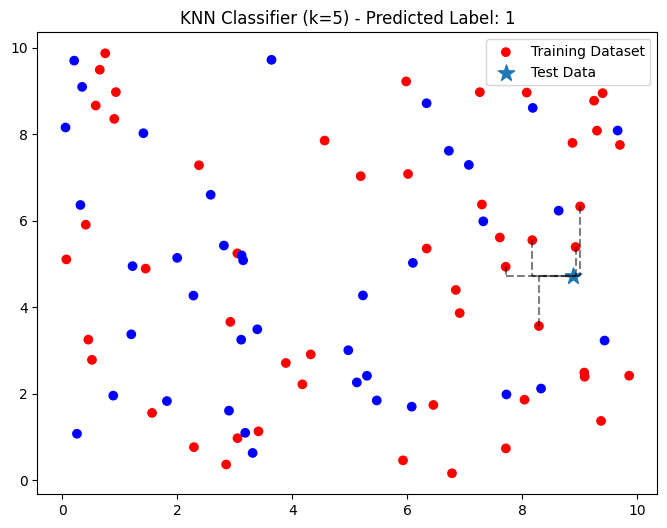

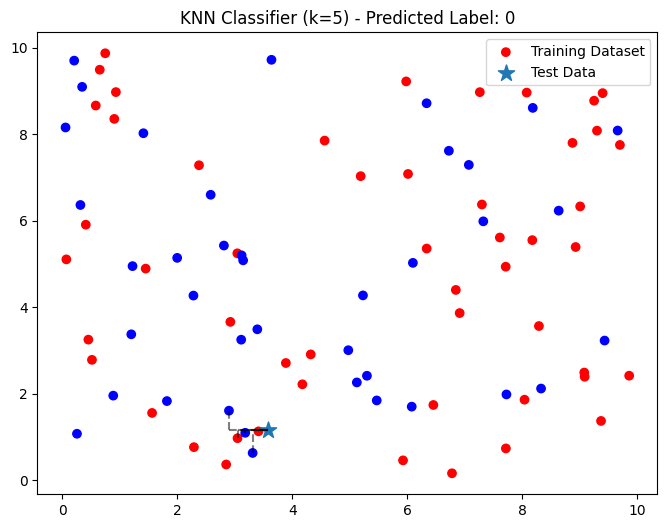

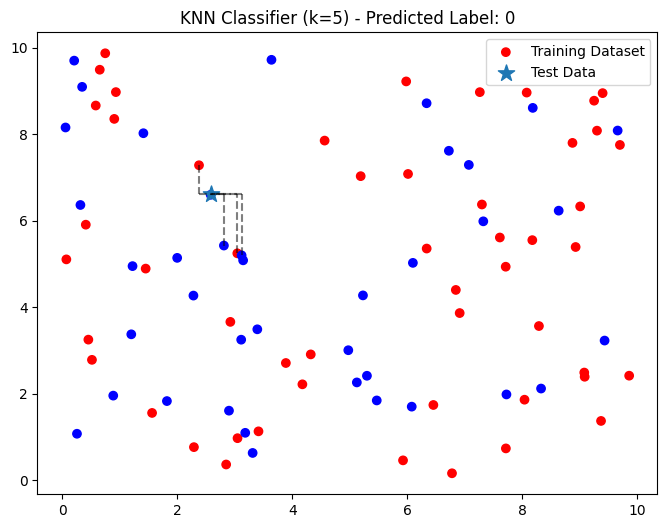

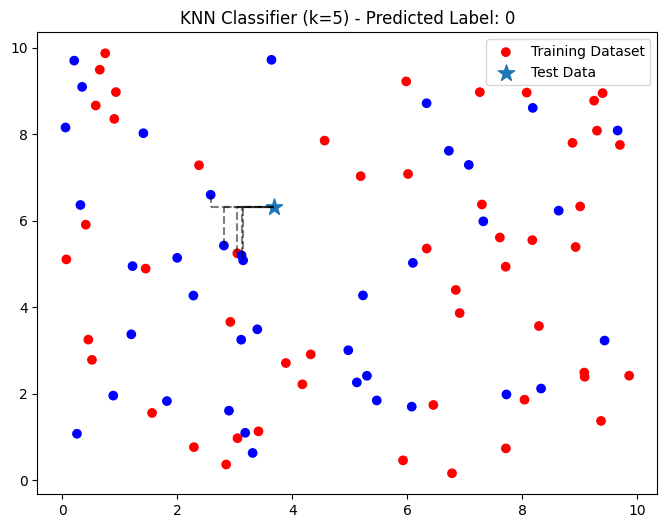

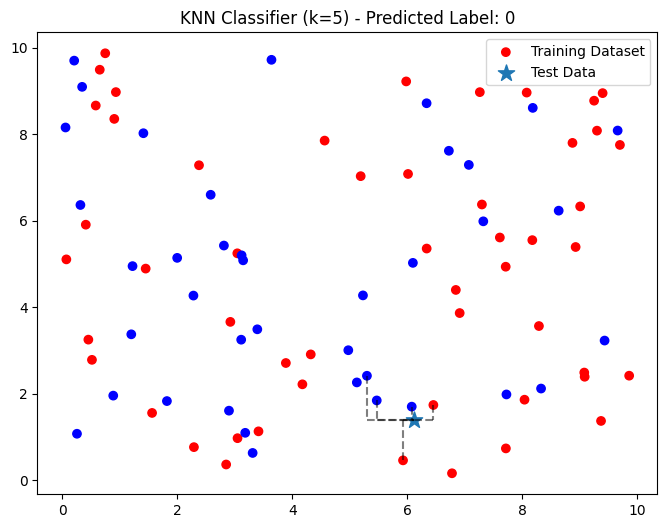

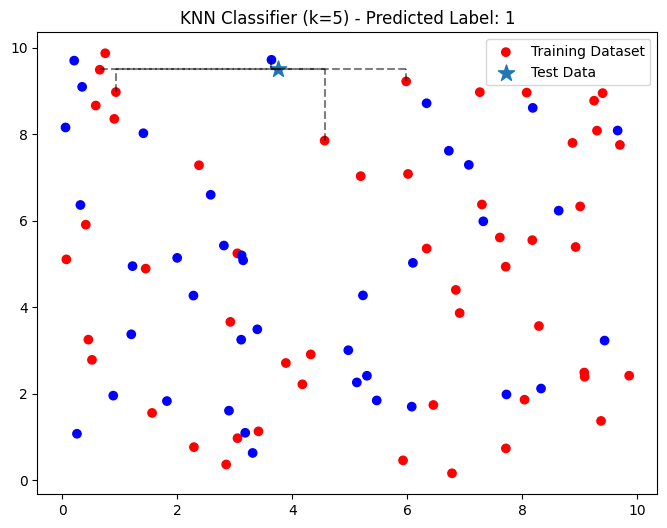

KNN 예측 값 [1 1 1 0 1 0 0 0 0 1]


In [54]:
# 맨해튼 거리
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, manhattan_distance, k)
print('KNN 예측 값', y_pred)

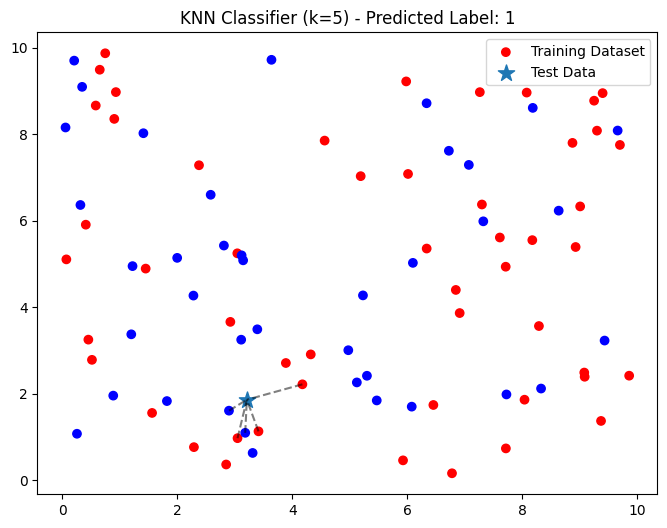

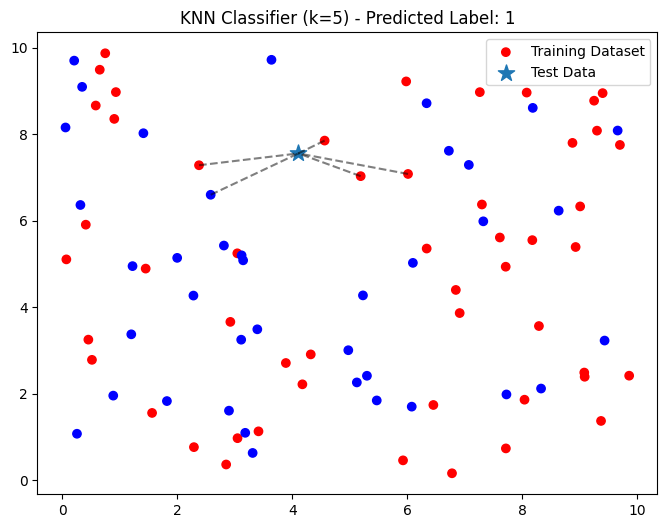

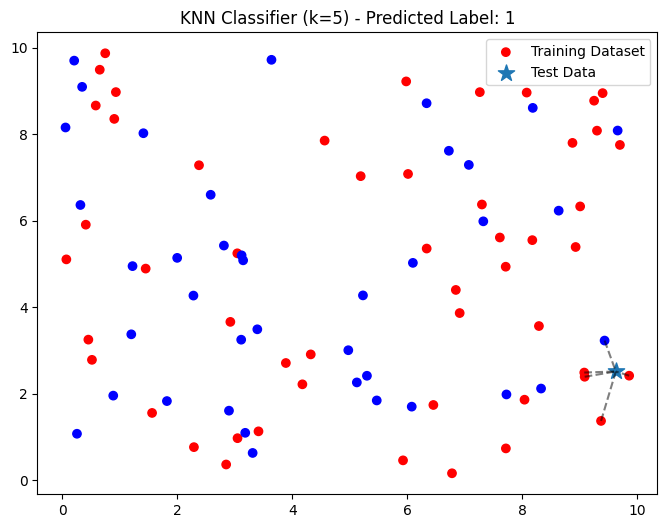

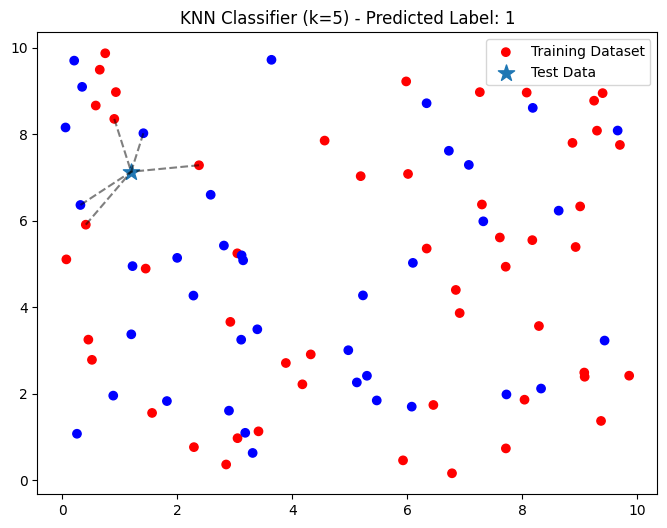

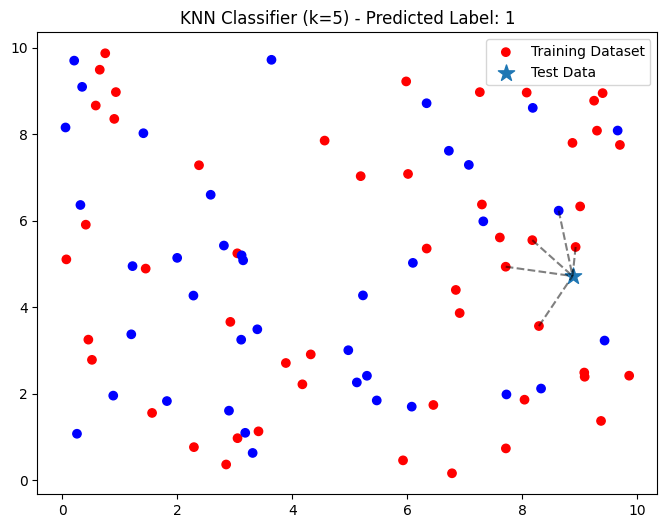

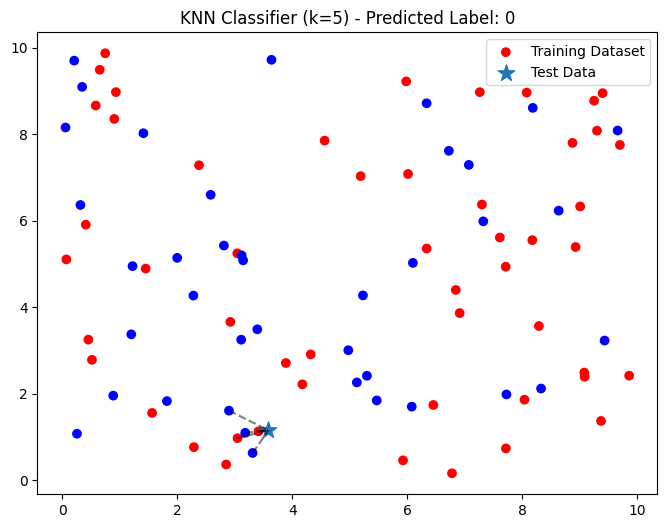

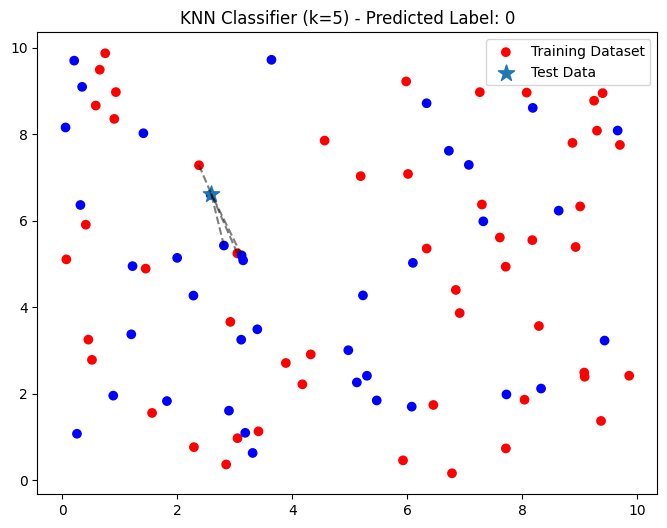

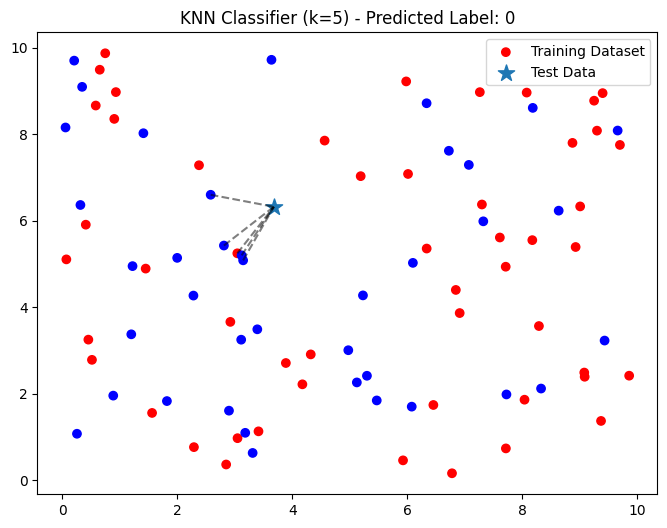

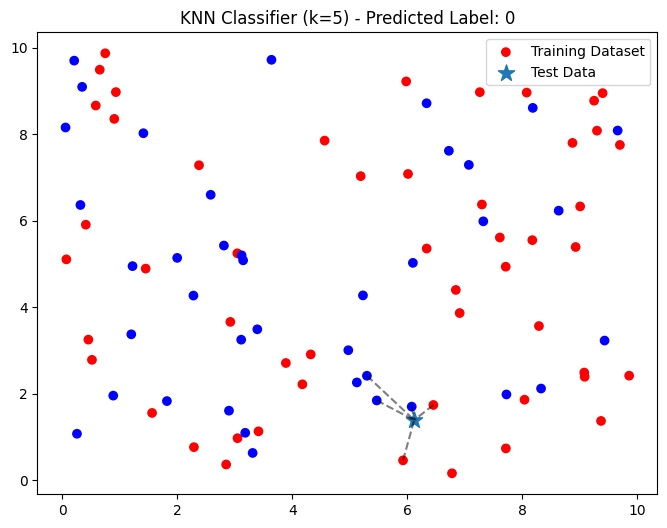

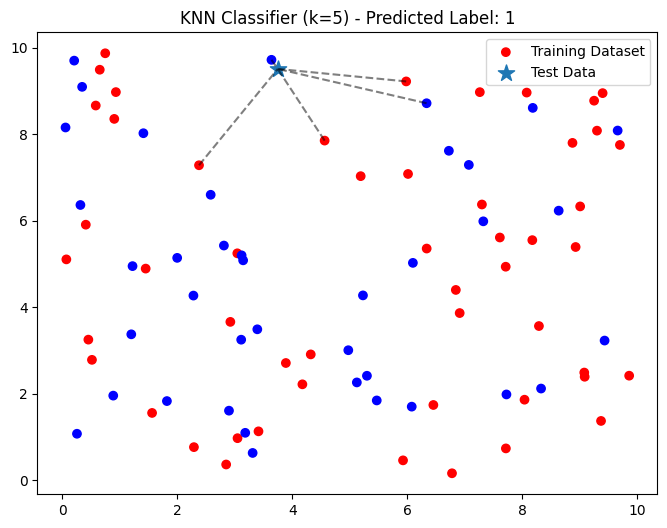

KNN 예측 값 [1 1 1 1 1 0 0 0 0 1]


In [55]:
# 유클리디안 거리
k = 5
y_pred = knn_classifier(X_train, y_train, X_test, euclidean_distance, k)
print('KNN 예측 값', y_pred)

In [56]:
np.random.seed(42)

n_samples = 100
X = np.random.uniform(low=0, high=10, size=(n_samples, 2))
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

noise = np.random.normal(loc=0, scale=1, size=X_train.shape[0])  # 랜덤 노이즈
y_train = 2 * X_train[:, 0] + 3 * X_train[:, 1] + noise

In [57]:
X_train

array([[3.04613769, 0.97672114],
       [3.8867729 , 2.71349032],
       [6.09564334, 5.02679023],
       [1.40924225, 8.02196981],
       [3.41066351, 1.13473521],
       [6.01115012, 7.08072578],
       [1.44894872, 4.8945276 ],
       [9.85650454, 2.42055272],
       [4.56069984, 7.85175961],
       [8.28737509, 3.56753327],
       [2.89751453, 1.61221287],
       [6.90937738, 3.86735346],
       [9.39498942, 8.9482735 ],
       [3.10982322, 3.25183322],
       [3.63629602, 9.71782083],
       [6.07544852, 1.70524124],
       [8.63103426, 6.23298127],
       [9.00418057, 6.33101457],
       [4.31945019, 2.9122914 ],
       [2.84840494, 0.36886947],
       [2.92144649, 3.66361843],
       [7.7096718 , 4.93795596],
       [6.77564362, 0.16587829],
       [0.88492502, 1.95982862],
       [8.172222  , 5.55200812],
       [0.20584494, 9.69909852],
       [1.19865367, 3.37615171],
       [4.17411003, 2.2210781 ],
       [7.72244769, 1.98715682],
       [0.65051593, 9.48885537],
       [0.

In [58]:
y_train

array([ 8.34241408, 16.14627044, 27.56472985, 26.1700425 , 12.09130717,
       33.73831049, 16.39017675, 27.63122084, 31.70199686, 28.06443459,
       11.79026325, 24.60013283, 46.59817547, 16.38792702, 37.24811469,
       19.16341373, 35.71562421, 36.2476687 , 16.48626015,  5.98760802,
       16.75664656, 30.57436346, 14.3256129 ,  8.47651916, 33.01347024,
       30.96251953, 12.26110566, 17.73162354, 22.03203318, 28.91044042,
        2.67423285, 31.58009339,  8.91517185, 29.49252859, 40.08746425,
       26.81640643, 27.89704102, 41.13083003, 16.92542196, 20.27690759,
       16.693933  , 25.90121784, 43.73774203, 18.03206387, 20.94368037,
       36.44502451, 23.07723485, 14.31849139, 24.93207256, 23.42101263,
       43.92061568, 42.19179691,  5.50769124, 32.78102267, 20.23593132,
       29.06806799, 32.56906459, 35.31911269, 10.23251775, 18.3924487 ,
       27.5532431 ,  9.17610226, 21.35527406, 24.03985636, 40.65959616,
       38.57507423, 24.86681089, 21.98144683, 20.16323886, 32.16

In [59]:
X_test

array([[3.20780065, 1.8651851 ],
       [4.10382923, 7.55551139],
       [9.62447295, 2.51782296],
       [1.19594246, 7.13244787],
       [8.87212743, 4.72214925],
       [3.58465729, 1.1586906 ],
       [2.58779982, 6.62522284],
       [3.67783133, 6.32305831],
       [6.11852895, 1.39493861],
       [3.74540119, 9.50714306]])

In [60]:
## 회귀 KNN
def knn_regressor(X_train, y_train, X_test, distance, k):
    y_pred = []
    for x_test in X_test:
        distances = [distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        print(k_nearest_labels)
        mean_value=np.mean(k_nearest_labels)
        y_pred.append(mean_value)

        ## 시각화 추가
        plt.figure(figsize=(8,6))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr',marker='o',label='Traning Data')
        plt.scatter(x_test[0], x_test[1], s=150,label='Test Data',marker='*')

        # 거리 방식에 따라 시각화 변경
        if distance.__name__ == 'manhattan_distance':
            for idx in k_indices:
                x1, y1 = X_train[idx]
                x2, y2 = x_test
                plt.plot([x1, x1], [y1, y2], 'k--', alpha=0.5)  # 세로 이동
                plt.plot([x1, x2], [y2, y2], 'k--', alpha=0.5)  # 가로 이동
        elif distance.__name__ == 'euclidean_distance':
            for idx in k_indices:
                x1, y1 = X_train[idx]
                x2, y2 = x_test
                plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.5)  # 직선 연결

        plt.title(f"KNN regressor (k={k}) - Predicted Label :{mean_value:.2f}")
        plt.legend()
        plt.show()

    return np.array(y_pred)

[11.790263254902897, 10.232517745960747, 12.0913071693676, 8.342414082080438, 17.731623543687107]


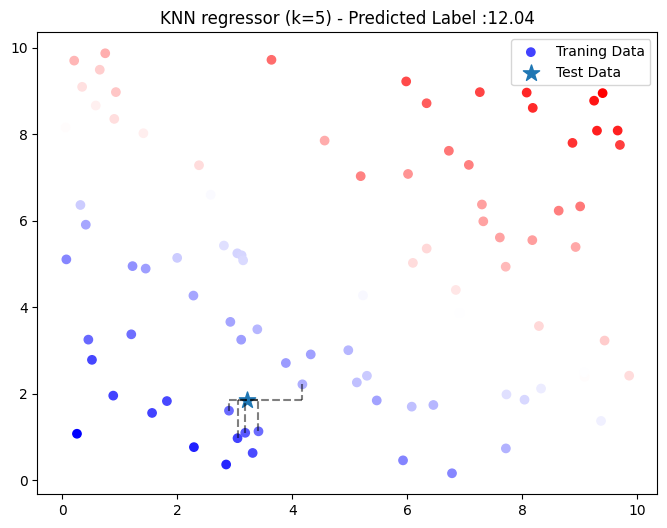

[31.701996855903804, 35.319112692377374, 27.553243101696985, 33.73831048965733, 24.165833196895782]


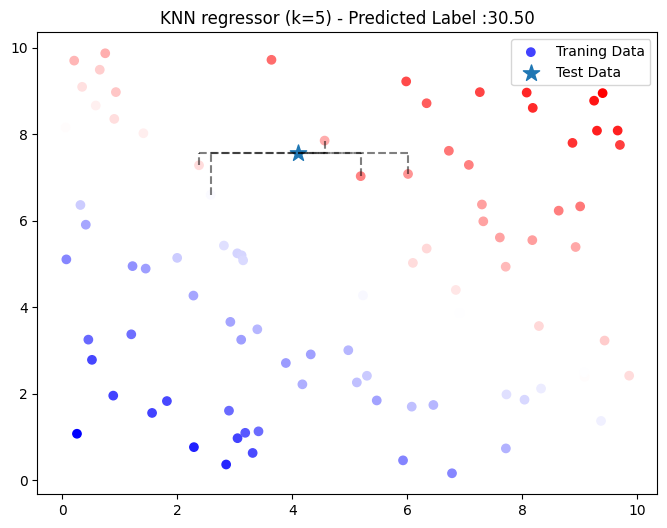

[27.631220836190856, 24.5523515750588, 24.866810891513143, 29.06806798978525, 23.42101262548272]


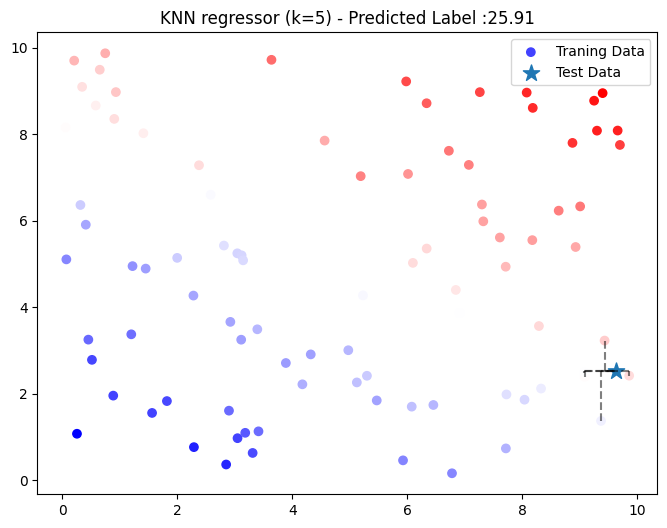

[26.170042504090077, 27.553243101696985, 27.498789291083316, 20.235931318856757, 24.165833196895782]


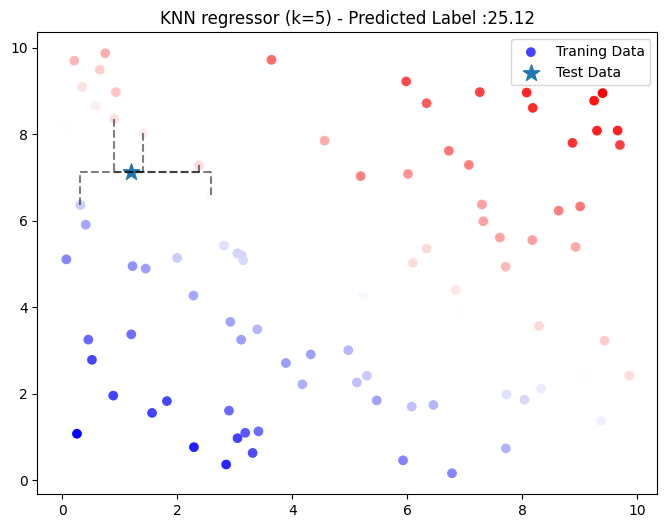

[32.16418203467733, 30.574363464839585, 33.01347024388609, 28.06443458758872, 36.24766869710716]


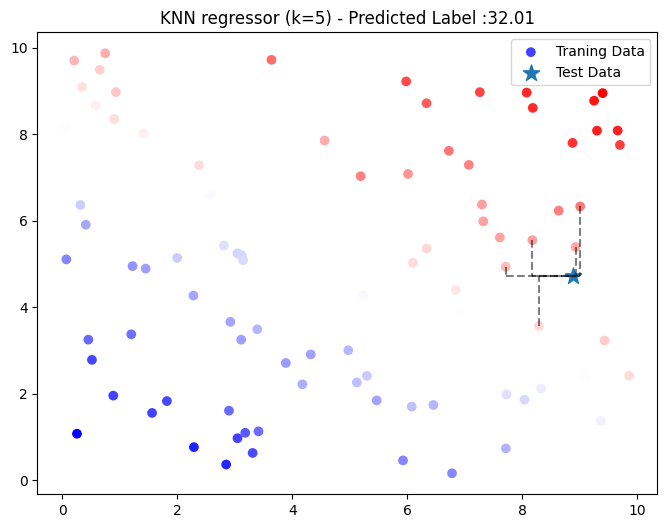

[12.0913071693676, 10.232517745960747, 8.342414082080438, 9.17610225693949, 11.790263254902897]


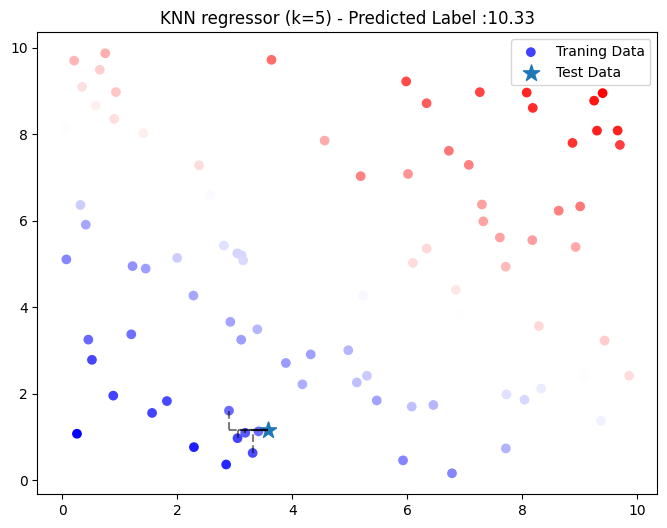

[24.165833196895782, 27.553243101696985, 21.981446827881392, 20.94368037195676, 21.10589552540541]


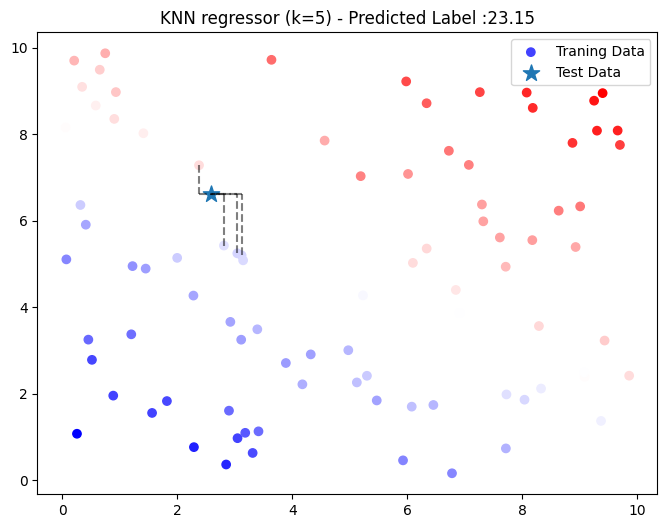

[24.165833196895782, 21.10589552540541, 20.94368037195676, 21.981446827881392, 21.42950391500072]


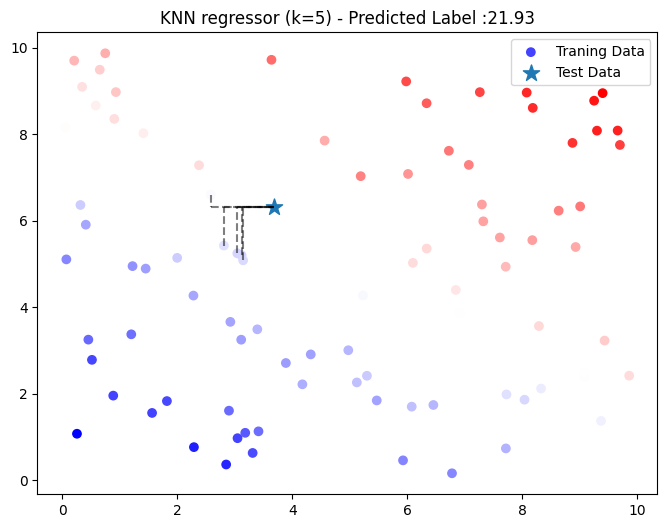

[19.16341373130146, 18.350907267920718, 16.693932996761607, 14.094237093637005, 20.163238860807187]


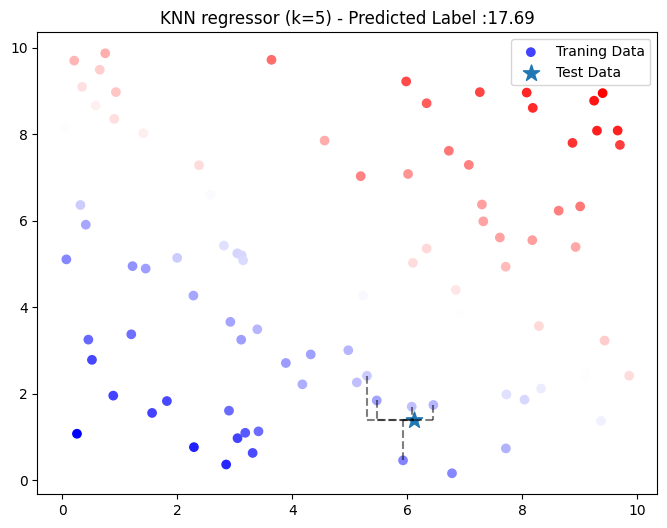

[37.248114689209196, 31.701996855903804, 40.08746425148875, 28.91044042088931, 29.492528588809876]


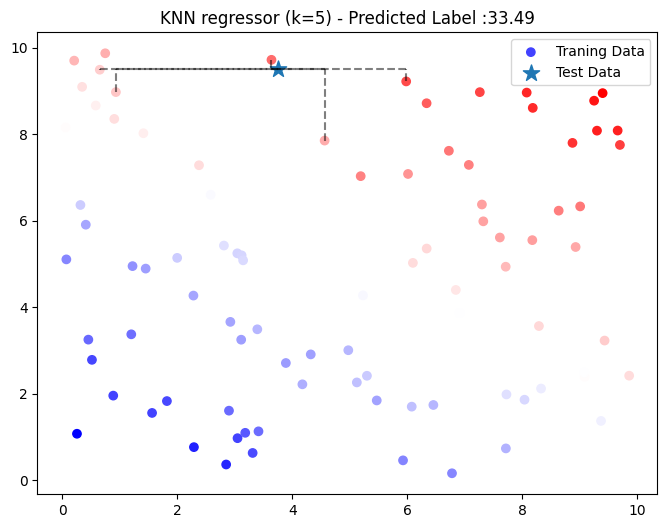

KNN 예측 값 [12.03762516 30.49569927 25.90789278 25.12476788 32.01282381 10.3265209
 23.1500198  21.92527197 17.69314599 33.48810896]


In [62]:
# 맨해튼 거리
k = 5
y_pred =knn_regressor(X_train, y_train, X_test, manhattan_distance, k)
print('KNN 예측 값',y_pred)

[11.790263254902897, 12.0913071693676, 10.232517745960747, 8.342414082080438, 17.731623543687107]


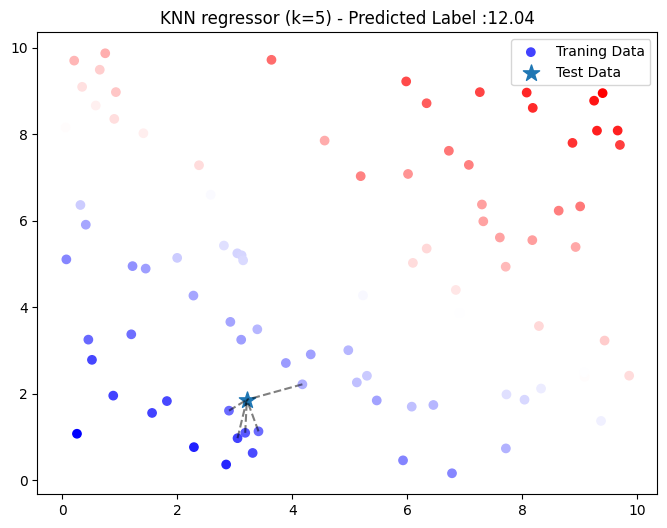

[31.701996855903804, 35.319112692377374, 27.553243101696985, 24.165833196895782, 33.73831048965733]


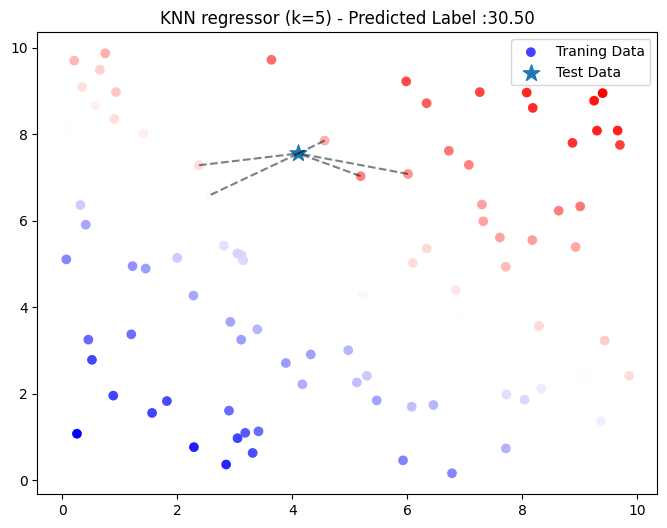

[27.631220836190856, 24.5523515750588, 24.866810891513143, 29.06806798978525, 23.42101262548272]


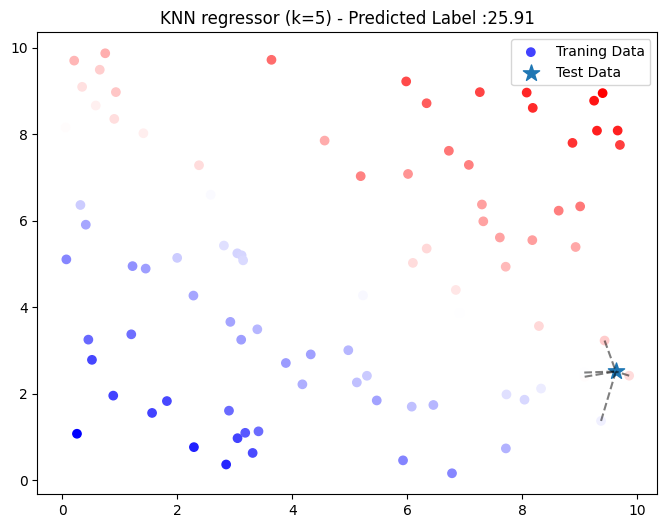

[26.170042504090077, 20.235931318856757, 27.553243101696985, 27.498789291083316, 16.929575255552884]


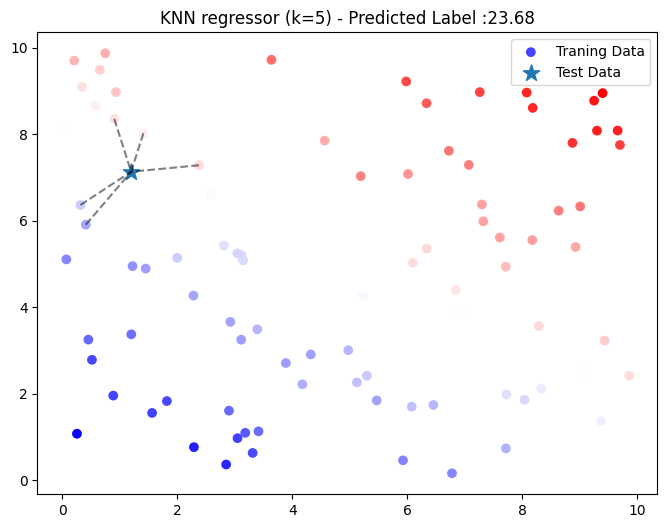

[32.16418203467733, 33.01347024388609, 30.574363464839585, 28.06443458758872, 35.71562420633573]


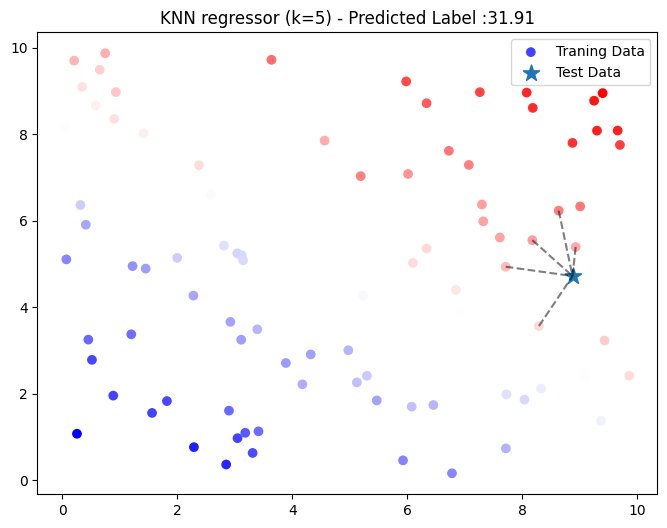

[12.0913071693676, 10.232517745960747, 8.342414082080438, 9.17610225693949, 11.790263254902897]


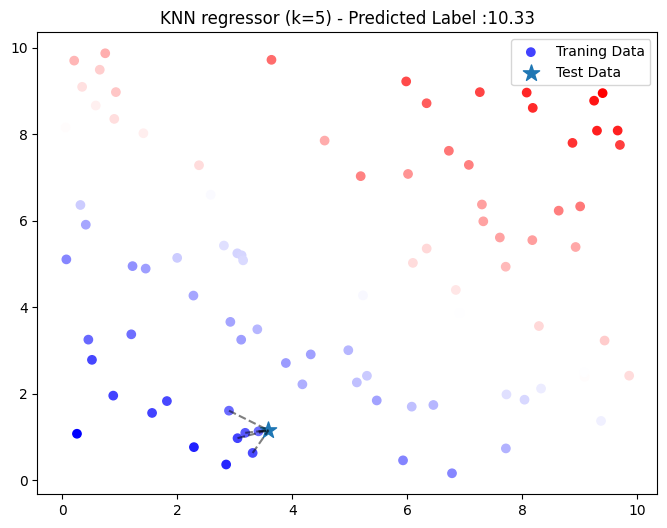

[24.165833196895782, 27.553243101696985, 21.981446827881392, 20.94368037195676, 21.10589552540541]


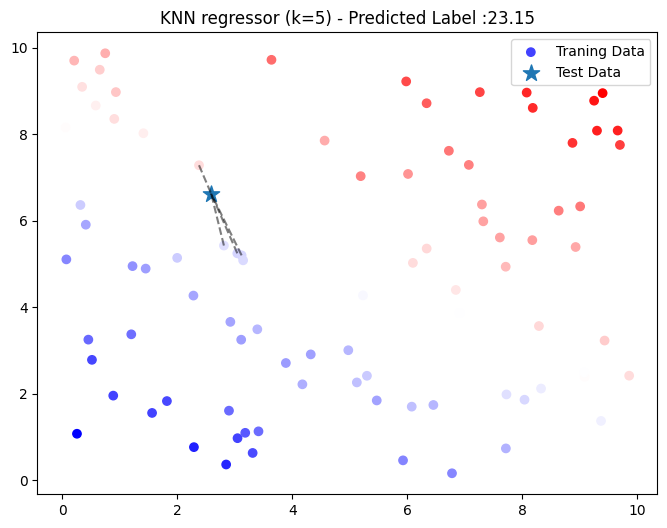

[24.165833196895782, 21.981446827881392, 20.94368037195676, 21.10589552540541, 21.42950391500072]


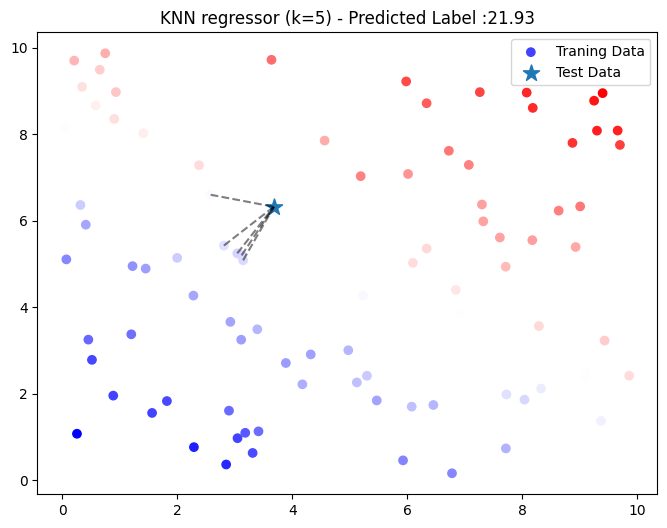

[19.16341373130146, 18.350907267920718, 16.693932996761607, 14.094237093637005, 20.163238860807187]


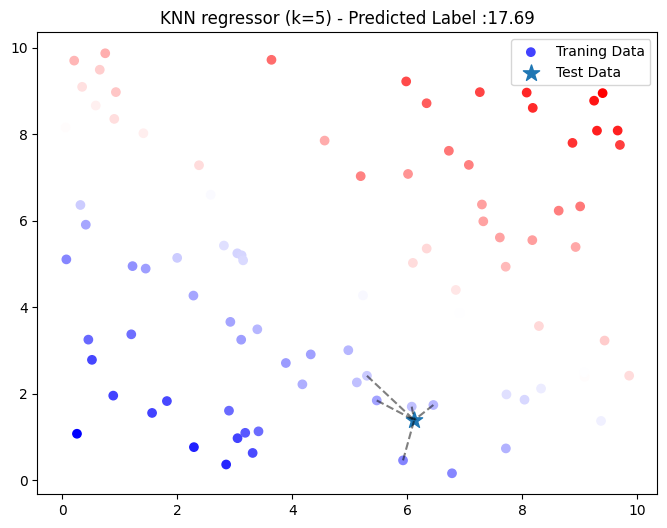

[37.248114689209196, 31.701996855903804, 40.08746425148875, 27.553243101696985, 38.5750742291]


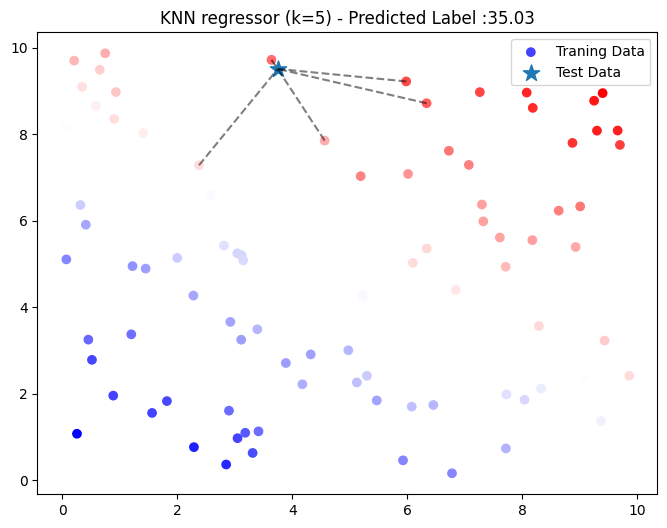

KNN 예측 값 [12.03762516 30.49569927 25.90789278 23.67751629 31.90641491 10.3265209
 23.1500198  21.92527197 17.69314599 35.03317863]


In [63]:
# 유클리디안 거리
k = 5
y_pred =knn_regressor(X_train, y_train, X_test, euclidean_distance, k)
print('KNN 예측 값',y_pred)

In [34]:
## 가중치 추가 비교
def knn_regressor(X_train, y_train, X_test, distance, k):
    y_pred = []
    for x_test in X_test:
        distances = [distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        mean_value=np.mean(k_nearest_labels)
        y_pred.append(mean_value)
    return np.array(y_pred)

def knn_weighted_regressor(X_train, y_train, X_test, distance, k, beta = 1):
    y_pred = []
    for x_test in X_test:
        distances = np.array([distance(x_test, x_train) for x_train in X_train])
        k_indices = distances.argsort()[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        k_distances = distances[k_indices]

        #거리 가중치 계산 추가
        weights = 1/(k_distances ** beta + 1e-8)
        weighted_mean = np.sum(weights * k_nearest_labels) / np.sum(weights)

        y_pred.append(weighted_mean)
    return np.array(y_pred)

In [35]:
# 새로운 데이터로 비교
np.random.seed(0)

n_samples = 50
X_train = np.random.uniform(low=0, high=10, size=(n_samples, 1))
y_train = np.sin(X_train).ravel() + np.random.normal(0,0.5,n_samples)
X_test = np.linspace(0,10,100).reshape(-1,1)

In [36]:
X_train = np.random.uniform(low=0, high=10, size=(n_samples, 1))

In [37]:
X_train

array([[8.81103197],
       [5.81272873],
       [8.81735362],
       [6.9253159 ],
       [7.2525428 ],
       [5.01324382],
       [9.56083635],
       [6.43990199],
       [4.23855049],
       [6.06393214],
       [0.19193198],
       [3.01574817],
       [6.60173537],
       [2.90077607],
       [6.18015429],
       [4.28768701],
       [1.35474064],
       [2.98282326],
       [5.69964911],
       [5.90872761],
       [5.74325249],
       [6.5320082 ],
       [6.5210327 ],
       [4.31418435],
       [8.96546596],
       [3.6756187 ],
       [4.35864925],
       [8.91923355],
       [8.06193989],
       [7.03888584],
       [1.00226887],
       [9.19482614],
       [7.142413  ],
       [9.98847007],
       [1.49448305],
       [8.68126057],
       [1.62492935],
       [6.15559564],
       [1.23819983],
       [8.48008229],
       [8.07318959],
       [5.69100739],
       [4.07183297],
       [0.69166995],
       [6.97428773],
       [4.53542683],
       [7.22055599],
       [8.663

In [38]:
k=5
#knn 회귀
y_pred_knn=knn_regressor(X_train,y_train, X_test, euclidean_distance,k)

#가중치 회귀
y_pred_weighted_knn=knn_weighted_regressor(X_train, y_train, X_test, euclidean_distance, k)

#실제값과 비교
y_true = np.sin(X_test).ravel()

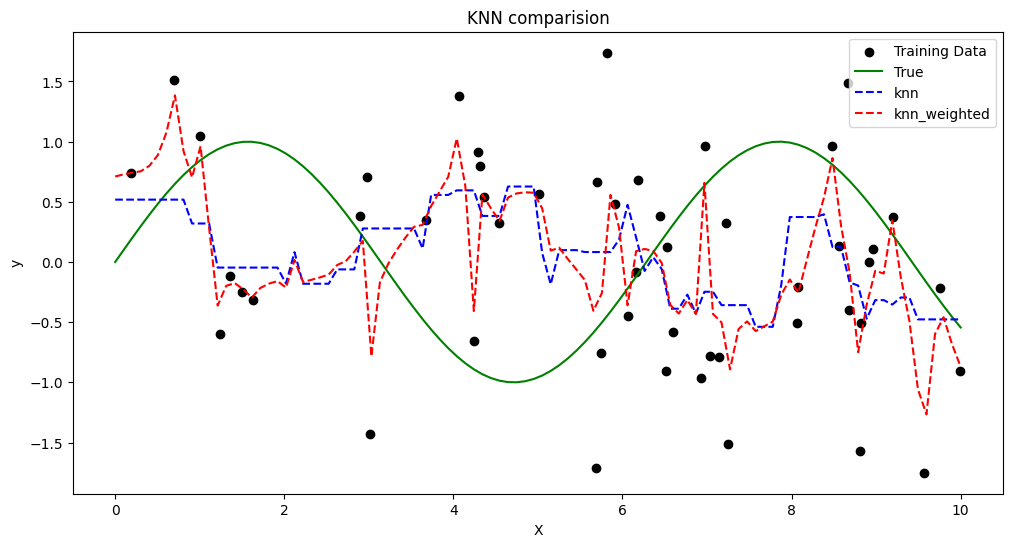

In [39]:
##시각화로 비교해서 확인하기
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.plot(X_test, y_true, color='green', label = 'True')
plt.plot(X_test, y_pred_knn, color='blue',linestyle='--', label = 'knn')
plt.plot(X_test, y_pred_weighted_knn, color='red',linestyle='--', label = 'knn_weighted')
plt.title('KNN comparision')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# sklearn knn 분류기
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 분류 데이터 생성
np.random.seed(42)

n_samples = 10
X = np.random.uniform(low=0, high=10, size=(n_samples, 2))
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train = np.random.choice([0, 1], size=X_train.shape[0])

In [ ]:
knn_cl=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [ ]:
knn_cl

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 예측
y_pred = knn_cl.predict(X_test)
print("Predicted Class:", y_pred)

array([1, 1])

In [ ]:
# 선택된 이웃 정보 확인
distances, indices = knn_cl.kneighbors(X_test)
print("Distances to Neighbors:", distances)
print("Indices of Neighbors:", indices )